In [2]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_zero_large',
    LOG_FILE='logs/extension_by_spontaneous_replay_large.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=2, PROBE_TIME=200,
    ALPHA=0,
    G_XS=np.arange(1., 1.5, 0.1),
    G_WS=np.arange(0.1, 1.5, 0.1),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

In [3]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_low_large',
    LOG_FILE='logs/extension_by_spontaneous_replay_large.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=2, PROBE_TIME=200,
    ALPHA=1,
    G_XS=np.arange(1., 1.5, 0.1),
    G_WS=np.arange(0.1, 1.5, 0.1),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

In [4]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_medium_large',
    LOG_FILE='logs/extension_by_spontaneous_replay_large.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=2, PROBE_TIME=200,
    ALPHA=2,
    G_XS=np.arange(1., 1.5, 0.1),
    G_WS=np.arange(0.1, 1.5, 0.1),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

In [5]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_high_large',
    LOG_FILE='logs/extension_by_spontaneous_replay_large.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=2, PROBE_TIME=200,
    ALPHA=10,
    G_XS=np.arange(1., 1.5, 0.1),
    G_WS=np.arange(0.1, 1.5, 0.1),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

Max replay prob = 0.284


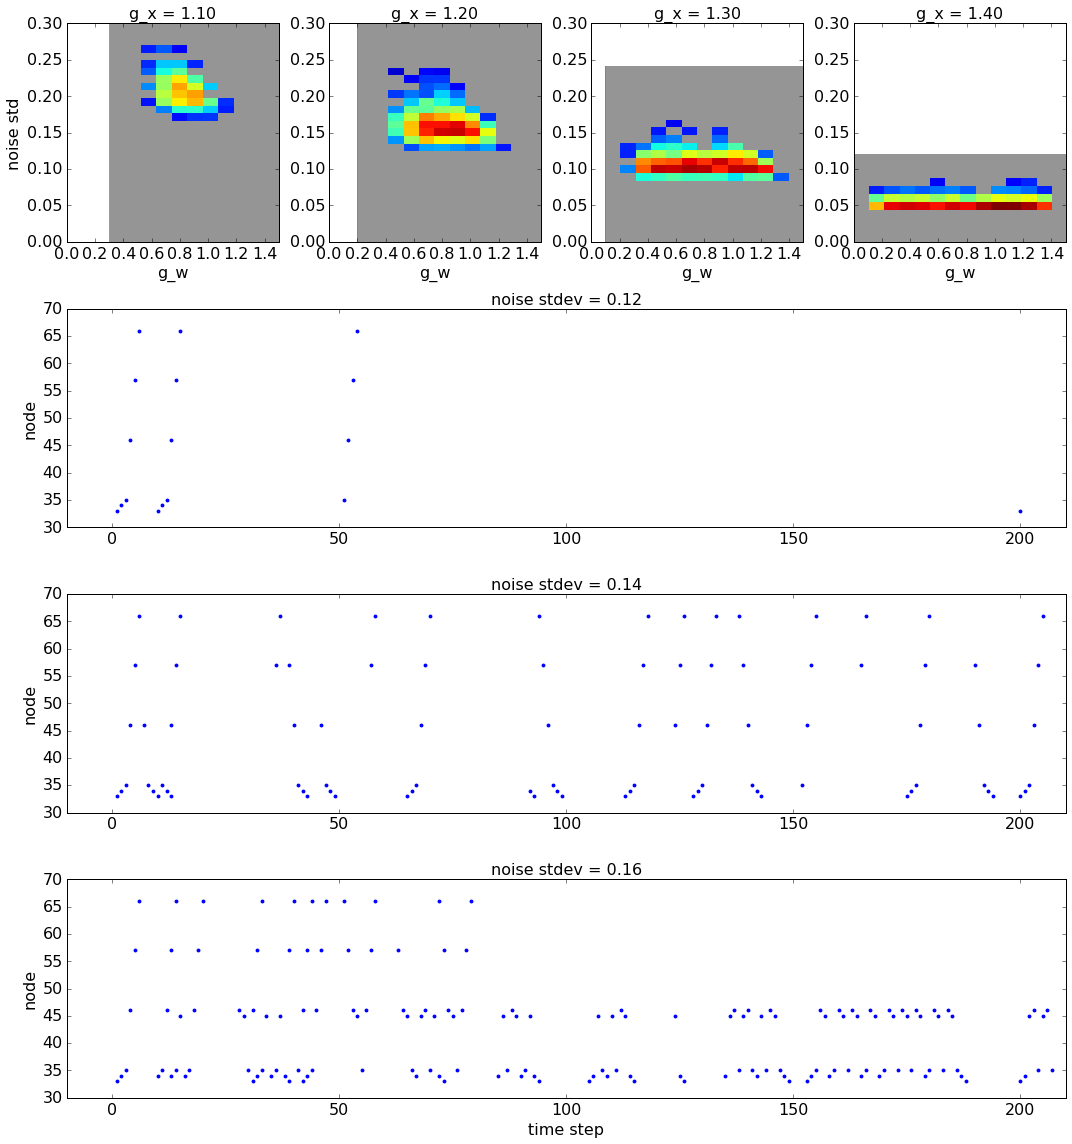

In [2]:
%matplotlib inline
from figures.final_paper import extension_by_spontaneous_replay

extension_by_spontaneous_replay(
    SEEDS_EXAMPLE=[0, 1, 2], NOISES_EXAMPLE=[0.12, 0.14, 0.16],
    W=1.1, G_X=1.2, GROUP_NAME='alpha_low_large', G_XS=[1.1, 1.2, 1.3, 1.4],
    X_LIM=(0, 1.5), Y_LIM=(0, 0.3));